In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\PROJECTS_DS\\KPMG-Virtual-Internship\\cleaned_datasets\\newcust.csv")

In [4]:
# Display the first few rows of the dataset
df.head()


,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,7/12/1957 0:00,General Manager,Manufacturing,Mass Customer,False,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,3/22/1970 0:00,Structural Engineer,Property,Mass Customer,False,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,8/28/1974 0:00,Senior Cost Accountant,Financial Services,Affluent Customer,False,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1/28/1979 0:00,Account Representative III,Manufacturing,Affluent Customer,False,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,9/21/1965 0:00,Financial Analyst,Financial Services,Affluent Customer,False,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [5]:
# Get summary statistics of the dataset
print(df.describe())

       past_3_years_bike_related_purchases       tenure     postcode  \
count                          1000.000000  1000.000000  1000.000000   
mean                             49.836000    11.388000  3019.227000   
std                              27.796686     5.037145   848.895767   
min                               0.000000     0.000000  2000.000000   
25%                              26.750000     7.000000  2209.000000   
50%                              51.000000    11.000000  2800.000000   
75%                              72.000000    15.000000  3845.500000   
max                              99.000000    22.000000  4879.000000   

       property_valuation         rank        value  
count         1000.000000  1000.000000  1000.000000  
mean             7.397000   498.819000     0.881714  
std              2.758804   288.810997     0.293525  
min              1.000000     1.000000     0.340000  
25%              6.000000   250.000000     0.649531  
50%              8.000000  

In [6]:
# Check the data types of each column
print(df.dtypes)

first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
dob                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                        bool
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
rank                                     int64
value                                  float64
dtype: object


In [7]:
# Check for missing values
print(df.isnull().sum())

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
rank                                   0
value                                  0
dtype: int64


In [8]:
# Count unique values in each column
print(df.nunique())

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
dob                                     959
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
rank                                    324
value                                   319
dtype: int64


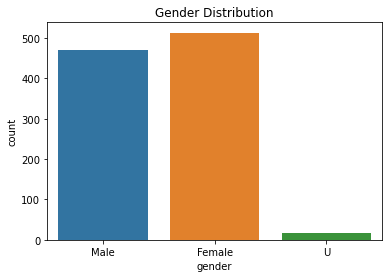

In [10]:
# Plotting the distribution of genders
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

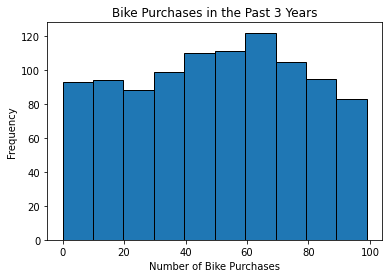

In [23]:
# Creating a histogram of bike purchases in the past 3 years
plt.hist(df['past_3_years_bike_related_purchases'], bins=10 ,edgecolor='black')
plt.xlabel('Number of Bike Purchases')
plt.ylabel('Frequency')
plt.title('Bike Purchases in the Past 3 Years')
plt.show()

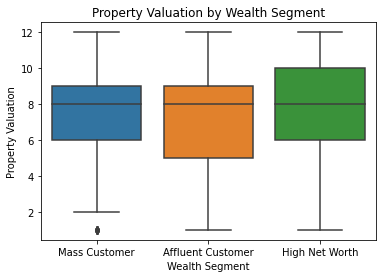

In [14]:
# Creating a box plot of property valuations by wealth segment
sns.boxplot(x='wealth_segment', y='property_valuation', data=df)
plt.xlabel('Wealth Segment')
plt.ylabel('Property Valuation')
plt.title('Property Valuation by Wealth Segment')
plt.show()

In [15]:
# Calculating the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                                     past_3_years_bike_related_purchases  \
past_3_years_bike_related_purchases                             1.000000   
deceased_indicator                                                   NaN   
tenure                                                         -0.034183   
postcode                                                        0.015208   
property_valuation                                             -0.010833   
rank                                                           -0.004392   
value                                                           0.004884   

                                     deceased_indicator    tenure  postcode  \
past_3_years_bike_related_purchases                 NaN -0.034183  0.015208   
deceased_indicator                                  NaN       NaN       NaN   
tenure                                              NaN  1.000000  0.030573   
postcode                                            NaN  0.030573  1.000000

In [16]:
# Performing hypothesis testing (e.g., t-tests, ANOVA)
from scipy.stats import ttest_ind, f_oneway

# Example t-test for bike purchases between genders
male_purchases = df[df['gender'] == 'Male']['past_3_years_bike_related_purchases']
female_purchases = df[df['gender'] == 'Female']['past_3_years_bike_related_purchases']
t_stat, p_value = ttest_ind(male_purchases, female_purchases)
print('T-statistic:', t_stat)
print('p-value:', p_value)


T-statistic: 0.7988887673599355
p-value: 0.4245482826559478


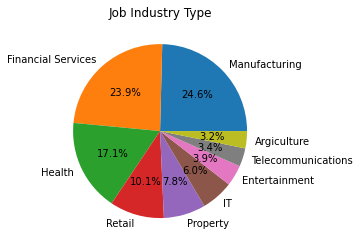

In [18]:
job_industry_counts = df['job_industry_category'].value_counts()
plt.pie(job_industry_counts, labels=job_industry_counts.index, autopct='%1.1f%%')
plt.title('Job Industry Type')
plt.show()

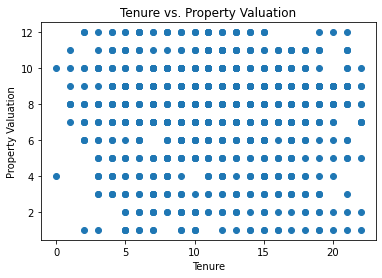

In [19]:
plt.scatter(df['tenure'], df['property_valuation'])
plt.title('Tenure vs. Property Valuation')
plt.xlabel('Tenure')
plt.ylabel('Property Valuation')
plt.show()

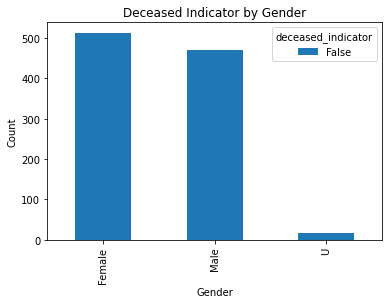

In [20]:
deceased_counts = df.groupby(['gender', 'deceased_indicator']).size().unstack()
deceased_counts.plot(kind='bar', stacked=True)
plt.title('Deceased Indicator by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

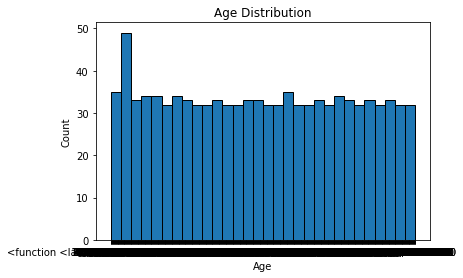

In [22]:
plt.hist(df['dob'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

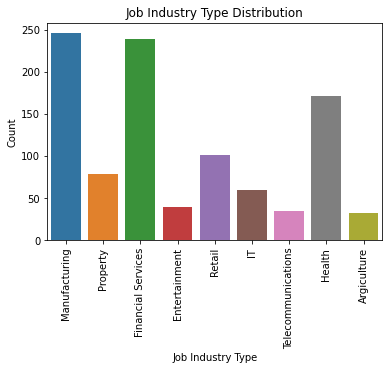

In [26]:
sns.countplot(x='job_industry_category', data=df)
plt.title('Job Industry Type Distribution')
plt.xlabel('Job Industry Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

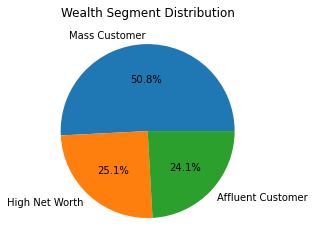

In [27]:
wealth_segment_counts = df['wealth_segment'].value_counts()
plt.pie(wealth_segment_counts, labels=wealth_segment_counts.index, autopct='%1.1f%%')
plt.title('Wealth Segment Distribution')
plt.show()

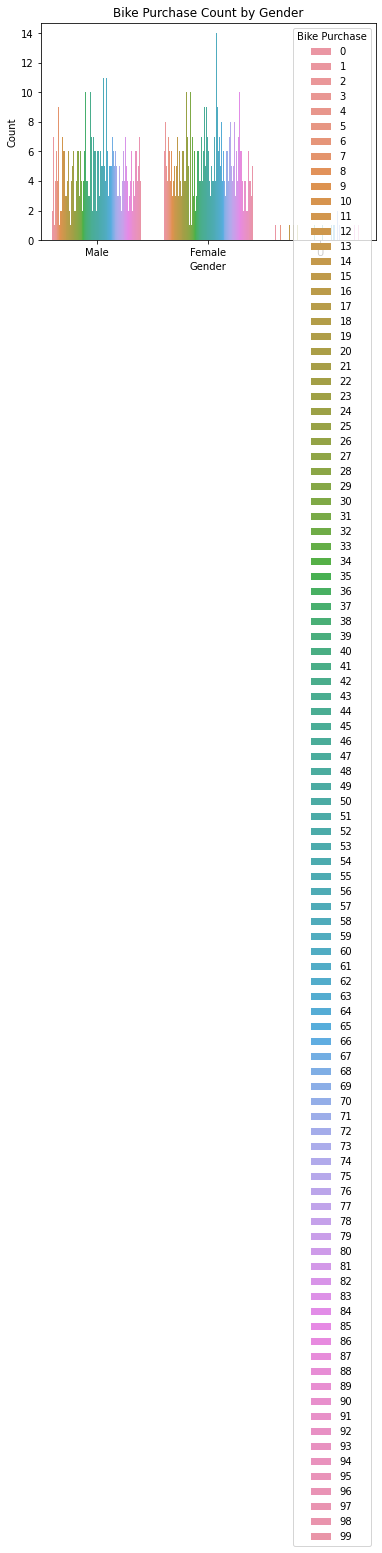

In [30]:
sns.countplot(x='gender', hue='past_3_years_bike_related_purchases', data=df)
plt.title('Bike Purchase Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Bike Purchase')
plt.show()

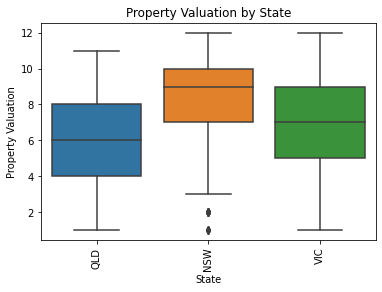

In [31]:
sns.boxplot(x='state', y='property_valuation', data=df)
plt.title('Property Valuation by State')
plt.xlabel('State')
plt.ylabel('Property Valuation')
plt.xticks(rotation=90)
plt.show()

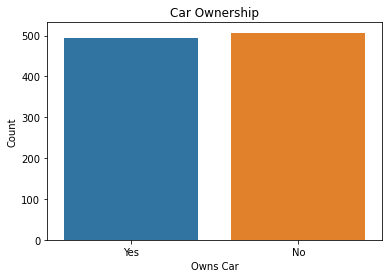

In [32]:
sns.countplot(x='owns_car', data=df)
plt.title('Car Ownership')
plt.xlabel('Owns Car')
plt.ylabel('Count')
plt.show()

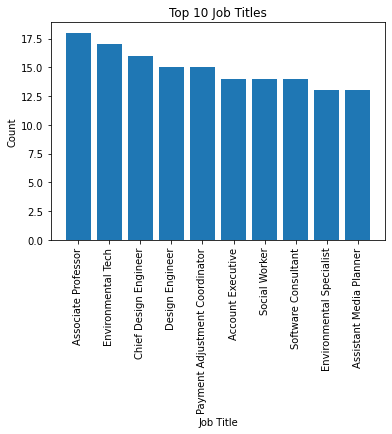

In [33]:
top_10_job_titles = df['job_title'].value_counts().head(10)
plt.bar(top_10_job_titles.index, top_10_job_titles.values)
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

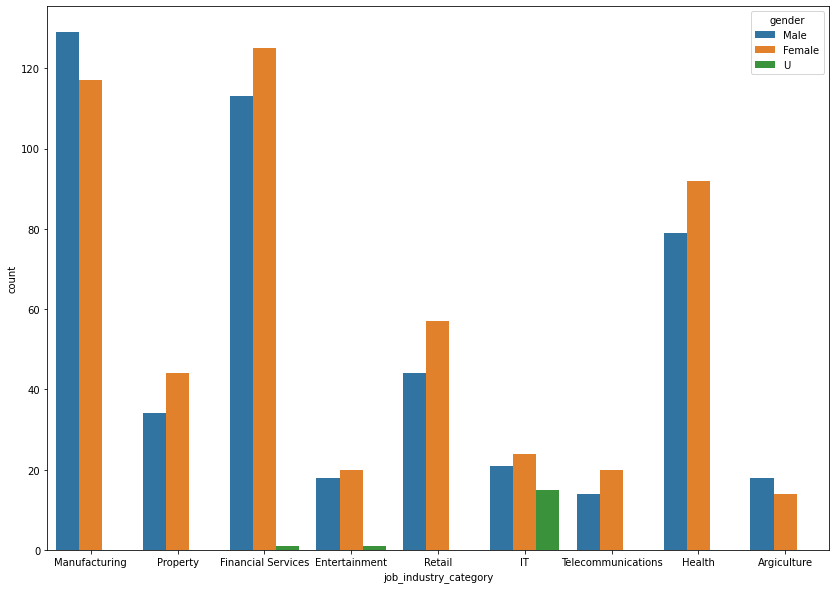

In [37]:
plt.figure(figsize=(14,10))
sns.countplot(data=df ,x= 'job_industry_category',hue = 'gender')
plt.show()